## **Visualização e interpretação dos dados**

In [56]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### **Base de Treino - Análise Exploratória**

In [57]:
# Importando arquivo .csv como um DataFrame pandas
arquivo_treino  =  './dataset/fashion-mnist_train.csv'
train_fmnist = pd.read_csv(arquivo_treino)

In [58]:
# Obtendo dimensões do DataFrame
train_fmnist.shape

(60000, 785)

In [59]:
# Obtendo as primeiras 5 linhas
train_fmnist.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
# Obtendo se pelo menos uma coluna possui valores nulos
"""  O primeiro any() retorna se há valores nulos em todas as colunas
dada a quantidade de colunas, outro any() é chamado a fim de 
conferir se pelo menos alguma das colunas é nula """
is_null = train_fmnist.isna().any().any()
print("Pelo menos uma coluna possui valores nulos" if is_null else "Nenhuma coluna possui valores nulos" )

Nenhuma coluna possui valores nulos


### **Visualização dos Dados**

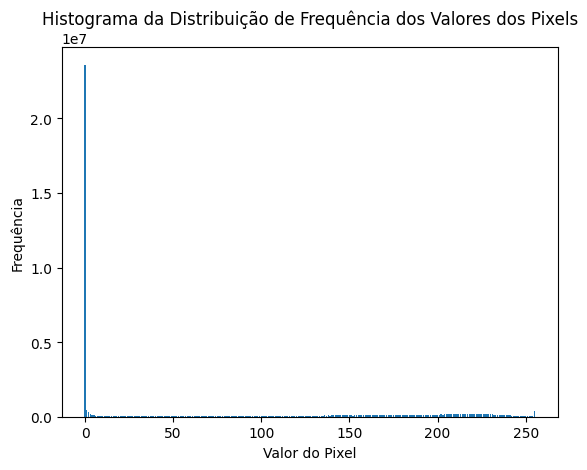

In [61]:
# Removendo a coluna de label para manter somente os valores dos pixels
pixels = train_fmnist.drop('label', axis=1)
""" pixels.stack() transforma o dataframe em uma série em que todas as colunas vão se condensar
em uma única coluna sendo assim o tamanho da série é dado por 60.000 linhas x 784 colunas
pixels.stack().value_counts() conta a ocorrência de cada valor de intensidade existente 
pixels.stack().value_counts().sort_index() ordena a série em termos dos novo índice, isto é, 
os valores de intensidade de pixel"""
value_counts = pixels.stack().value_counts().sort_index()

plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Valor do Pixel')
plt.ylabel('Frequência')
plt.title('Histograma da Distribuição de Frequência dos Valores dos Pixels')

plt.show()

> - O histograma acima mostra a contagem de ocorrências dos valores de intensidade dos pixels para todas as imagens.  
> - Podemos notar que a maioria dos pixels possuem intensidade 0, isto é, boa parte da região das imagens possuem a cor preta. A cor branca, intensidade 255, parece ser a segunda que mais aparece nas imagens.

### **Distribuição da intensidade média com base no rótulo** 

82.87926403061225
56.74837202380952
95.71932759353741
66.20148724489796
98.15565603741497
34.87051700680272
85.11509778911565
42.83567219387755
90.0357619047619
77.00715029761905


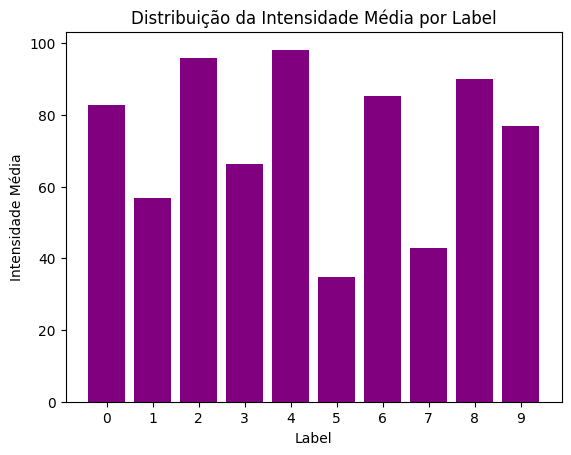

In [62]:
# 10 classes de artigos de moda no total
num_classes = 10  
# Preenchendo um array de tamanho 10 com 0s
mean_intensities = np.zeros(num_classes)

# Percorrendo de 0 a 9
for i in range(num_classes):
    # Obtendo as imagens existentes para cada classe
    class_data = train_fmnist[train_fmnist['label'] == i]
    """ Obtendo a média aritmética das intensidades de pixel  
    desconsiderando a primeira coluna (coluna de label) """
    """ Neste caso é obtida a média de todos os valores 
    em todo dataframe, independente da linha e coluna """
    mean_intensity = class_data.iloc[:, 1:].values.mean()
    print(mean_intensity)
    # Atribuindo o valor médio para o índice da classe no vetor
    mean_intensities[i] = mean_intensity

plt.bar(range(num_classes), mean_intensities, color='purple')
plt.title('Distribuição da Intensidade Média por Label')
plt.xlabel('Label')
plt.ylabel('Intensidade Média')
plt.xticks(range(num_classes))
plt.show()

[ 86.49234694 118.06632653 114.37372449 ... 105.3125      68.17729592
 117.60586735]
[72.19515306 81.27040816 48.55867347 ... 72.08035714 52.29081633
 34.17346939]
[115.34693878  74.23214286  51.70663265 ...  64.36352041  88.61607143
 120.8125    ]
[85.08418367 97.94642857 73.90816327 ... 51.44260204 53.97704082
 31.63137755]
[ 92.07397959 107.62882653 128.50255102 ... 109.71045918  84.32908163
 105.65178571]
[14.19005102 37.07908163 50.7244898  ... 49.01913265 74.69005102
 32.80612245]
[120.63137755 124.72066327  64.15561224 ... 109.64158163  15.47959184
 134.5369898 ]
[44.00382653 43.28061224 57.96556122 ... 53.93239796 42.25637755
 74.17984694]
[ 66.28443878  41.52168367  56.85459184 ...  76.70408163  87.05357143
 110.55357143]
[58.88520408 64.49744898 92.28188776 ... 65.44260204 99.4119898
 91.03826531]


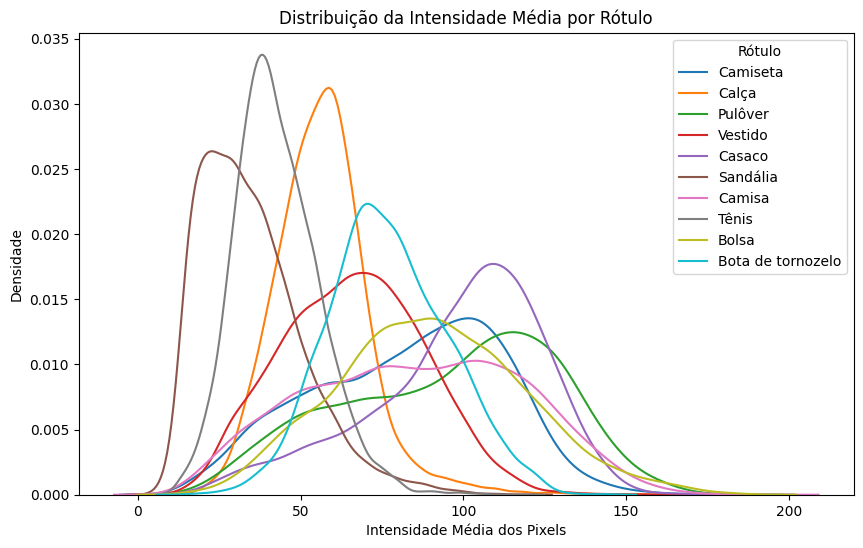

In [63]:
num_classes = 10
mean_intensities = []

for i in range(num_classes):
    class_data = train_fmnist[train_fmnist['label'] == i]
    """ Neste caso a média é calculada ao longo do eixo 1, 
    o que significa que a média é calculada para cada linha do dataframe 
    gerando um valor médio para cada imagem da classe"""
    mean_intensity = class_data.iloc[:, 1:].values.mean(axis=1)
    print(mean_intensity)
    # Adicionando o vetor com as médias ao vetor geral
    mean_intensities.append(mean_intensity)

label_dictionary = {0: "Camiseta",
                    1: "Calça",
                    2: "Pulôver",
                    3: "Vestido",
                    4: "Casaco",
                    5: "Sandália",
                    6: "Camisa",
                    7: "Tênis",
                    8: "Bolsa",
                    9: "Bota de tornozelo"}

# Criar um gráfico de densidade
plt.figure(figsize=(10, 6))
for i in range(num_classes):
    # sns.kdeplot(mean_intensities[i], label=str(i))
    sns.kdeplot(mean_intensities[i], label=label_dictionary[i])
plt.title('Distribuição da Intensidade Média por Rótulo')
plt.xlabel('Intensidade Média dos Pixels')
plt.ylabel('Densidade')
plt.legend(title='Rótulo')
plt.show()

> - É possível perceber que em geral o padrão das distribuições parecem seguir uma distribuição normal.  
> - Aparentemente tênis e calça parecer ter a uma distribuição normal mais consistente.

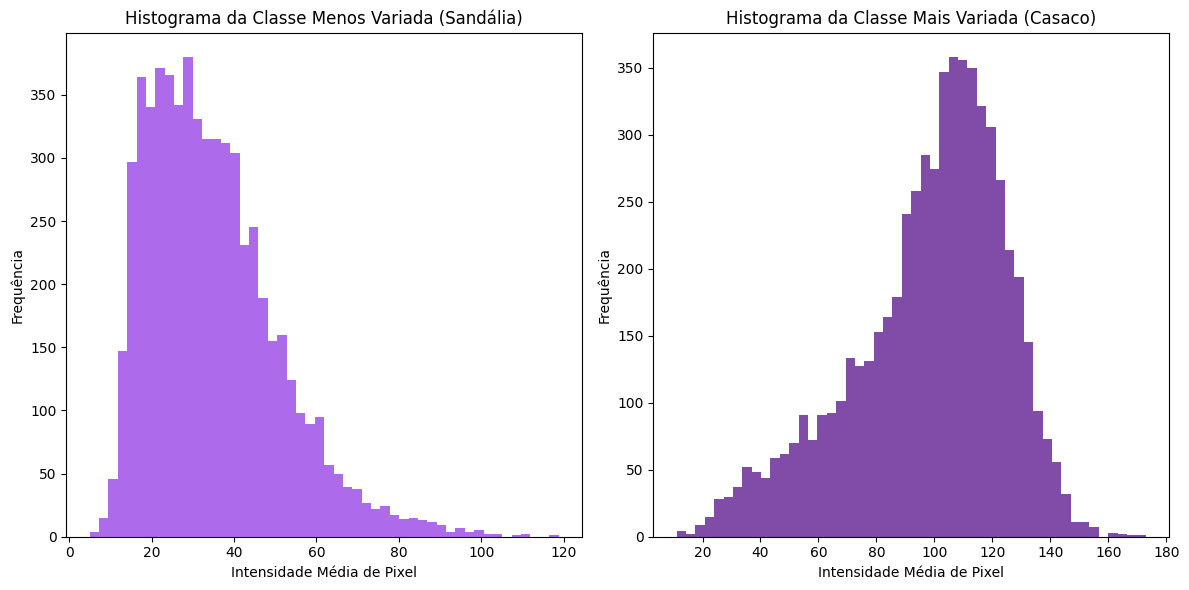

In [64]:
class_variances = []

for i in range(10):
    class_data = train_fmnist[train_fmnist['label'] == i]
    """ A variância é uma medida de dispersão que indica o quão distantes os 
    valores de um conjunto estão da média, neste caso estão sendo analisados 
    todos os valores de pixels para cada classe """
    class_variance = np.var(class_data.iloc[:, 1:].values) 
    class_variances.append(class_variance)

""" Obtendo os índices das classes mais e menos variadas
argmax e arfmin retornam o índice dos maiores e menores valores
calculados, respectivamente """
most_varied_class = np.argmax(class_variances)
least_varied_class = np.argmin(class_variances)

# Configurando 1 figura com 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotando histograma da classe menos variada
least_varied_data = train_fmnist[train_fmnist['label'] == least_varied_class].iloc[:, 1:].mean(axis=1)
axs[0].hist(least_varied_data, bins=50, color='blueviolet', alpha=0.7)
axs[0].set_title(f'Histograma da Classe Menos Variada ({label_dictionary[least_varied_class]})')
axs[0].set_xlabel('Intensidade Média de Pixel')
axs[0].set_ylabel('Frequência')

# Plotando histograma da classe mais variada
most_varied_data = train_fmnist[train_fmnist['label'] == most_varied_class].iloc[:, 1:].mean(axis=1)
axs[1].hist(most_varied_data, bins=50, color='indigo', alpha=0.7)
axs[1].set_title(f'Histograma da Classe Mais Variada ({label_dictionary[most_varied_class]})')
axs[1].set_xlabel('Intensidade Média de Pixel')
axs[1].set_ylabel('Frequência')

# Ajustando o layout para evitar sobreposição
plt.tight_layout()
plt.show()

> - O histograma da classe Sandália mostra que os valores dos pixels estão mais concentrados em torno da média, enquanto o histograma de Casaco demonstra que os valores estão mais dispersos em torno da média.  
> - A presença de caudasmais longas no histograma dois certifica a presença de algunsvalores de pixels considerados outliers em relação ao conjunto de dados.

### **Criando e Visualizando Exemplos de Imagens no formato PGM ASCII**  
As imagens PGM (Portable Gray Map) ASCII são um tipo de formato de arquivo de imagem que armazena imagens em tons de cinza de forma textual legível pelo humano. O formato PGM ASCII é uma variação do formato PGM, que pode armazenar imagens em tons de cinza ou em escala de cinza de forma simples e eficiente.

In [65]:
for i in range(10):
    # Obtendos as imagens para cada classe
    class_data = train_fmnist[train_fmnist['label'] == i]
    # Armazenando a primeira imagenm como exemplo
    img_example = class_data.values[0]
    """ 0: "Camiseta/top",
    1: "Calça",
    2: "Pulôver",
    3: "Vestido",
    4: "Casaco",
    5: "Sandália",
    6: "Camisa",
    7: "Tênis",
    8: "Bolsa",
    9: "Bota de tornozelo """
    # Criando nome da imagem
    image_name = './pgm_files/image{i}.pgm'
    # Criando imagem
    pgm_file = open(f'./pgm_files/image{i}.pgm','w')
    # Definindo dados do cabeçalho da imagem
    format = 'P2'
    height = '28'
    width = '28'
    max_intensity = '255'

    # Escrevendo cabeçalho
    pgm_file.write(format+'\n')
    pgm_file.write(f'{height} {width}'+'\n')
    pgm_file.write(max_intensity+'\n')

    """ Percorrendo cada linha do arquivo 
    e escrevendo o pixel e adicionando uma quebra 
    de linha a cada 28 pixels """
    height = 28
    for j in range(len(img_example)):
        pixel = str(img_example[j])
        pgm_file.write(pixel + ' ')
        if j == height:
            pgm_file.write('\n')
            height += 28
    
    print(f'File ./pgm_files/image{i}.pgm created!')
    pgm_file.close()

File ./pgm_files/image0.pgm created!
File ./pgm_files/image1.pgm created!
File ./pgm_files/image2.pgm created!
File ./pgm_files/image3.pgm created!
File ./pgm_files/image4.pgm created!
File ./pgm_files/image5.pgm created!
File ./pgm_files/image6.pgm created!
File ./pgm_files/image7.pgm created!
File ./pgm_files/image8.pgm created!
File ./pgm_files/image9.pgm created!


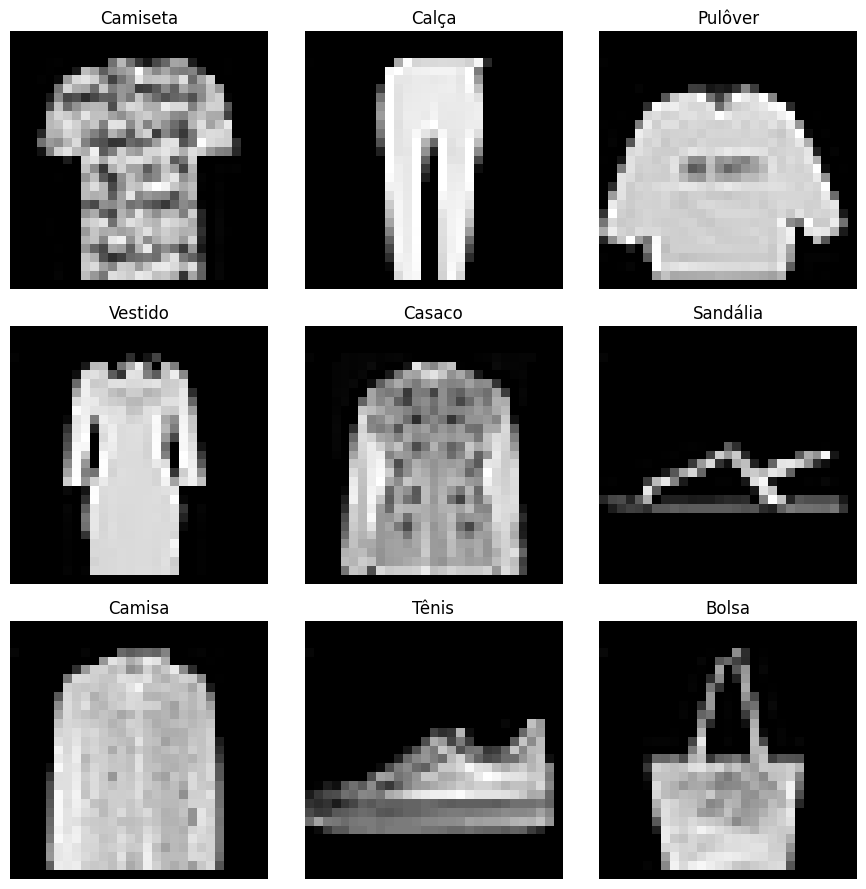

In [66]:
"""
    read_ascii_pgm
    Lê um arquivo PGM em formato ASCII e retorna a matriz de pixels.
    entrada:
        string com nome do arquivo
    saída:
        vetor bidimensional com dimensões 28x28 com os pixels do arquivo
"""
def read_ascii_pgm(filename):
    
    # Abrindo arquivo em modo de leitura
    with open(filename, 'r') as f:
        # Salavando o conteudo em uma string
        lines = f.readlines()

    """ Obtendo a largura e altura na segunda linha
    separando-as por espaço em branco """
    width, height = map(int, lines[1].split())

    """ Criando um vetor de dimensoes 29x29 para preencher 
    com os pixels """
    data = np.zeros((height+1, width+1), dtype=np.uint8)
    # Ignorando as duas primeiras linhas (formato e dimensões)
    for y in range(3,height):
        # Mapeando os valores para inteiros
        row = map(int, lines[y].split())
        # Percorrendo o vetor e adicionando na matriz de dados
        for x, val in enumerate(row):
            data[y, x] = val
    return data

images = [read_ascii_pgm(f'./pgm_files/image{i}.pgm') for i in range(10)]

fig, axes = plt.subplots(3, 3, figsize=(9, 9))
label=0

# Iterando sobre os subplots e imagens correspondentes usando zip(axes.ravel(), images)
# O método zip combina os elementos de axes.ravel() (subplots achatados em uma única dimensão)
# e images (lista de imagens) em pares, permitindo iterar sobre eles ao mesmo tempo
for ax, image in zip(axes.ravel(), images):
    # Mostrando a imagem no subplot atual
    ax.imshow(image, cmap='gray', vmin=0, vmax=255)
    
    # Desativando as bordas do subplot
    ax.axis('off')
    
    # Definindo o título do subplot com base no dicionário de rótulos
    ax.set_title(label_dictionary[label])
    
    # Incrementando o contador de rótulos
    label += 1

# Ajustando o layout da figura
plt.tight_layout()

### **Rede Neural Simples**

In [67]:
# Importando bibliotecas para criação e treinamento dos modelos
from keras.models import Sequential
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from keras.regularizers import l2

# Importando bibliotecas para
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import ConfusionMatrixDisplay

> - Utilizando a biblioteca TensorFlow com a API Keras para construir e treinar a rede neural


> - A versão 1 do modelo de rede neural possui uma camada Falltten responsável por transformar dados multidimensionais em um vetor unidimensional
> - Além disso, o modelo possui 3 camadas ocultas e uma camada de saída  
> - A camada de entrada possui 784 nós, correspondendo ao número de pixels em cada  imagem
> - As camadas ocultas possuem 200, 100 e 50 neurônios, respectivamente, e usam a função de ativação ReLU
> - A camada de saída possui 10 nós e usa a função de ativação softmax para produzir uma distribuição de probabilidade de pertencimento a cada classe  


> - O modelo é compilado utilizando o otimizador Adam com uma taxa de aprendizado de 0.001  
> - A função de perda escolhida é a entropia cruzada categórica, apropriada para problemas de classificação multiclasse  
> - A métrica de avaliação escolhida é a acurácia

In [68]:
neural_network_modelv1 = Sequential([
    Flatten(input_shape=(784,)),
    Dense(200, activation='relu'),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(10, activation='softmax')
])

adam = Adam(learning_rate=0.001)
neural_network_modelv1.compile(optimizer=adam,
              loss=["categorical_crossentropy"],
              metrics=['accuracy'])

neural_network_modelv1.summary()

c:\Users\018117631\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 182,660 (713.52 KB)

 Trainable params: 182,660 (713.52 KB)

 Non-trainable params: 0 (0.00 B)

> - A versão 2 do modelo possui a mesma estrutura da versão 2 mas para fins de redução de **overfitting** o modelo possui uma camada de dropout entre cada camada densa com uma taxa de dropout de 20%  
> - O dropout é uma técnica de regularização que desativa aleatoriamente um determinado percentual de unidades de uma camada durante o treinamento, ajudando a evitar o overfitting 


In [69]:
neural_network_modelv2 = Sequential([
    Flatten(input_shape=(784,)),
    Dropout(0.2),
    Dense(200, activation='relu'),
    Dropout(0.2),
    Dense(100, activation='relu'),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

adam = Adam(learning_rate=0.001)
neural_network_modelv2.compile(optimizer=adam,
              loss=["categorical_crossentropy"],
              metrics=['accuracy'])

neural_network_modelv2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 182,660 (713.52 KB)

 Trainable params: 182,660 (713.52 KB)

 Non-trainable params: 0 (0.00 B)

#### **Normalização e One-Hot-Encoding**

In [70]:
# Colunas com os pixels
X_train = train_fmnist.drop('label', axis=1)

# Coluna com a label
Y_train = train_fmnist['label']

In [71]:
# Normalizando os valores de pixel para o intervalo [0, 1]
X_train = X_train.astype('float32') / 255

> - Dividindo os dados em conjuntos de treinamento e validação (80%, 20%)  
> - A ideia principal de dividir o conjunto de dados em um conjunto de validação é evitar que o modelo se torne bom em classificar as amostras no conjunto de treinamento, mas não seja capaz de generalizar e fazer classificações precisas nos dados que não viu antes

In [72]:
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

> A binarização one-hot encoding permite representar categorias como vetores numéricos, mantendo a distinção entre elas

In [73]:
label_binarizer = LabelBinarizer()
# Aplicando one-hot encoding nas labels da base de treino
y_train_encoded = label_binarizer.fit_transform(y_train)
# Aplicando one-hot encoding nas labels da base de validação
y_val_encoded = label_binarizer.fit_transform(y_val)

In [74]:
print("Label original:", y_train.iloc[1])
print("Label após one-hot encoding:", y_train_encoded[1])

Label original: 7
Label após one-hot encoding: [0 0 0 0 0 0 0 1 0 0]


### **Treinamento da Rede Neural**

**Treinamento da versão 1 do modelo de rede neural**
> - O número de épocas é definido como 100, sendo assim, a rede será treinada por 100 iterações completas sobre o conjunto de dados de treinamento
> - O tamanho do batch é definido como 500, ous seja, 500 amostras serão usadas em cada passo de treinamento
> - O modo verbose é definido como 0 para que a saída do treinamento não seja exibida durante a execução
> - Os dados de treinamento são embaralhados (*shuffle=True*) antes de cada época para evitar que o modelo se ajuste a padrões específicos dos dados de treinamento
> - Além disso, são fornecidos dados de validação (*x_val* e *y_val_encoded*), o que permite avaliar o desempenho do modelo em um conjunto de dados separado durante o treinamento

In [75]:
neural_network_historyv1 = neural_network_modelv1.fit(np.array(x_train),
          np.array(y_train_encoded),
          epochs=100,
          batch_size=500,
          verbose=0,
          shuffle=True,
          validation_data=(np.array(x_val), np.array(y_val_encoded)))

**Treinamento da versão 2 do modelo de rede neural**
> - O callback *EarlyStopping* serve para interromper o treinamento do modelo automaticamente quando uma determinada condição não é mais atendida, com base em uma métrica monitorada. Neste caso, o callback monitora a perda (loss) no conjunto de treinamento  
> - O parâmetro *patience* indica o número de épocas que o treinamento pode continuar sem melhoria na métrica monitorada antes que o treinamento seja interrompido, sendo assim, se a perda no conjunto de treinamento não mostrar melhoria por 5 épocas consecutivas, o treinamento será interrompido

In [76]:
callback = EarlyStopping(monitor='loss', patience=5)
neural_network_historyv2 = neural_network_modelv2.fit(np.array(x_train),
          np.array(y_train_encoded),
          epochs=100,
          batch_size=500,
          verbose=0,
          shuffle=True,
          validation_data=(np.array(x_val), np.array(y_val_encoded)),
          callbacks=[callback])

**Visualização das métricas durante o treinamento do modelo**  
O esperado durante o treinamento é que  

- **Curva de acurácia**: deve aumentar ao longo das époas a medida que o modelo é treinado e ajustado para melhorar sua capacidade de fazer previsões corretas no conjunto de treinamento  
- **Curva de perda**: tende a diminuir ao longo das épocas à medida que o modelo é treinado para minimizar a diferença entre as previsões e os rótulos verdadeiros no conjunto de treinamento

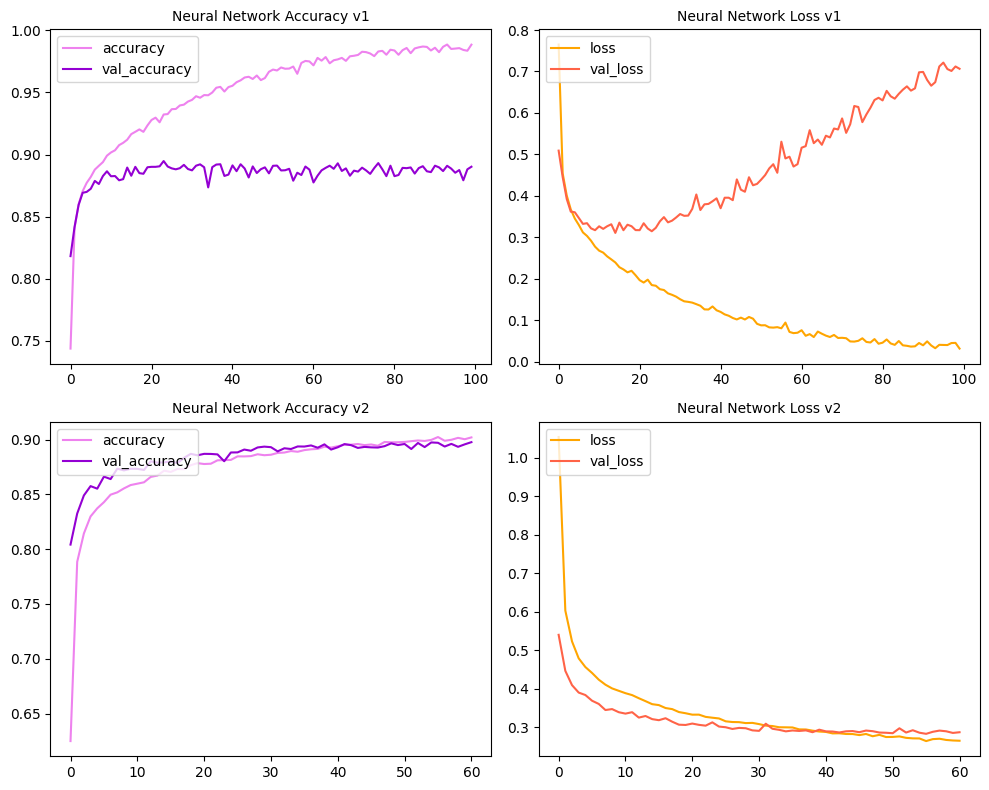

In [77]:
fig, axs = plt.subplots(2,2,figsize=(10,8))
axs[0, 0].plot(neural_network_historyv1.history['accuracy'], color='violet', label='accuracy')
axs[0, 0].plot(neural_network_historyv1.history['val_accuracy'], color='darkviolet', label='val_accuracy')
axs[0, 0].set_title('Neural Network Accuracy v1', fontsize=10)

axs[0, 1].plot(neural_network_historyv1.history['loss'], color='orange',label='loss')
axs[0, 1].plot(neural_network_historyv1.history['val_loss'], color='tomato', label='val_loss')
axs[0, 1].set_title('Neural Network Loss v1', fontsize=10)

axs[0, 0].legend(loc="upper left")
axs[0, 1].legend(loc="upper left")

axs[1, 0].plot(neural_network_historyv2.history['accuracy'], color='violet', label='accuracy')
axs[1, 0].plot(neural_network_historyv2.history['val_accuracy'], color='darkviolet', label='val_accuracy')
axs[1, 0].set_title('Neural Network Accuracy v2', fontsize=10)

axs[1, 1].plot(neural_network_historyv2.history['loss'], color='orange',label='loss')
axs[1, 1].plot(neural_network_historyv2.history['val_loss'], color='tomato', label='val_loss')
axs[1, 1].set_title('Neural Network Loss v2', fontsize=10)

axs[1, 0].legend(loc="upper left")
axs[1, 1].legend(loc="upper left")
plt.tight_layout()
plt.show()

> - Os resultados do modelo v1, demonstram que a curva de acurácia para os dados de validação se mantém constante enquanto a curva de perda de validação aumenta, isso indica um caso de **overfitting**, onde o modelo está se ajustando muito bem aos dados de treinamento, mas não está generalizando bem para dados não vistos  
> - Sendo assim, para melhorar o desempenho da versão 1 do modelo, foram implementadas as técnicas de Dropout na modelagem e de Early Stopping para a versão 2 do modelo e os resultados obtidos foram significativamente melhores

### **Desempenho da Rede Neural nos Dados de Teste**

In [78]:
# Carregando os dados de teste em um DataFrame
test_fminist = pd.read_csv('./dataset/fashion-mnist_test.csv')
test_fminist.shape

(10000, 785)

In [79]:
# Colunas com os pixels
X_test = test_fminist.drop('label', axis=1)

# Coluna com a label
Y_test = test_fminist['label']

In [80]:
# Normalizando os valores para estarem no intervalo [0,1]
x_test = X_test.astype('float32') / 255

In [81]:
# Aplicando one-hot encoding nas labels de teste
y_test_encoded = label_binarizer.fit_transform(Y_test)

In [82]:
results = neural_network_modelv1.evaluate(np.array(x_test), y_test_encoded, batch_size=128)

print('Test loss:', results[0])
print('Test accuracy:', results[1])

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8945 - loss: 0.6433
Test loss: 0.6587949395179749
Test accuracy: 0.8960000276565552


In [83]:
results = neural_network_modelv2.evaluate(np.array(x_test), y_test_encoded, batch_size=128)

print('Test loss:', results[0])
print('Test accuracy:', results[1])

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8924 - loss: 0.2907
Test loss: 0.28178274631500244
Test accuracy: 0.8984000086784363


> Os valores de acurácia para a versão 2 do modelo foi suavemente melhor do que para a versão 1, contudo, a queda no valor de perda foi significativa o que demonstra que o modelo melhorou em termos de generalização. Para ter uma conclusão mais precisa, vamos avaliar três outras métricas:
- Precisão 
- Recall
- F1-score

In [84]:
from sklearn.metrics import precision_recall_fscore_support

In [85]:
y_true = Y_test
y_pred = neural_network_modelv1.predict(x_test)
y_pred_discrete = np.argmax(y_pred, axis=1)

precision_v1, recall_v1, f1_score_v1, _ =precision_recall_fscore_support(y_true, y_pred_discrete, average='macro')

y_pred = neural_network_modelv2.predict(x_test)
y_pred_discrete = np.argmax(y_pred, axis=1)
precision_v2, recall_v2, f1_score_v2, _ =precision_recall_fscore_support(y_true, y_pred_discrete, average='macro')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


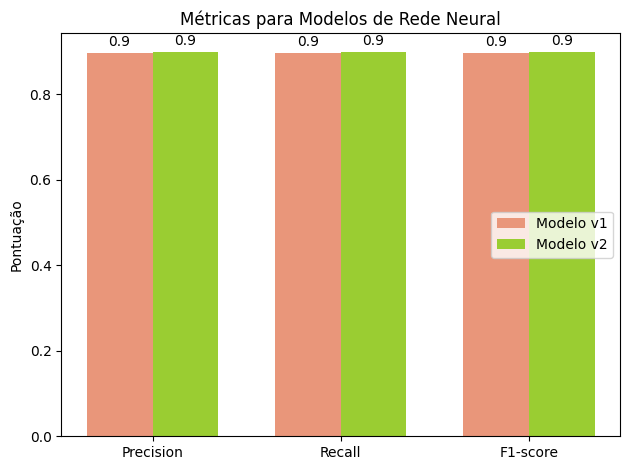

In [86]:
# Labels para os modelos
metrics = ['Precision', 'Recall', 'F1-score']

# Posições no eixo x para cada barra
x = np.arange(len(metrics))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots()

# Adicionando as barras para cada métrica do modelo 1
rectangles1 = ax.bar(x - width/2, [precision_v1, recall_v1, f1_score_v1], width, color= 'darksalmon', label='Modelo v1')

# Adicionando as barras para cada métrica do modelo 2
rectangles2 = ax.bar(x + width/2, [precision_v2, recall_v2, f1_score_v2], width, color= 'yellowgreen', label='Modelo v2')


def autolabel(rectangles):
    for rect in rectangles:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rectangles1)
autolabel(rectangles2)

ax.set_ylabel('Pontuação')
ax.set_title('Métricas para Modelos de Rede Neural')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend(loc='center right')
plt.tight_layout()
plt.show()

#### **Matriz de Confusão para Avaliação dos Resultados**

In [87]:
class_names = list(label_dictionary.values())
print(class_names)

['Camiseta', 'Calça', 'Pulôver', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota de tornozelo']


In [88]:
class estimator:
  _estimator_type = ''
  classes_=[]
  def __init__(self, model, classes):
    self.model = model
    self._estimator_type = 'classifier'
    self.classes_ = classes
  def predict(self, X):
    y_prob= self.model.predict(X)
    y_pred = y_prob.argmax(axis=1)
    return y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


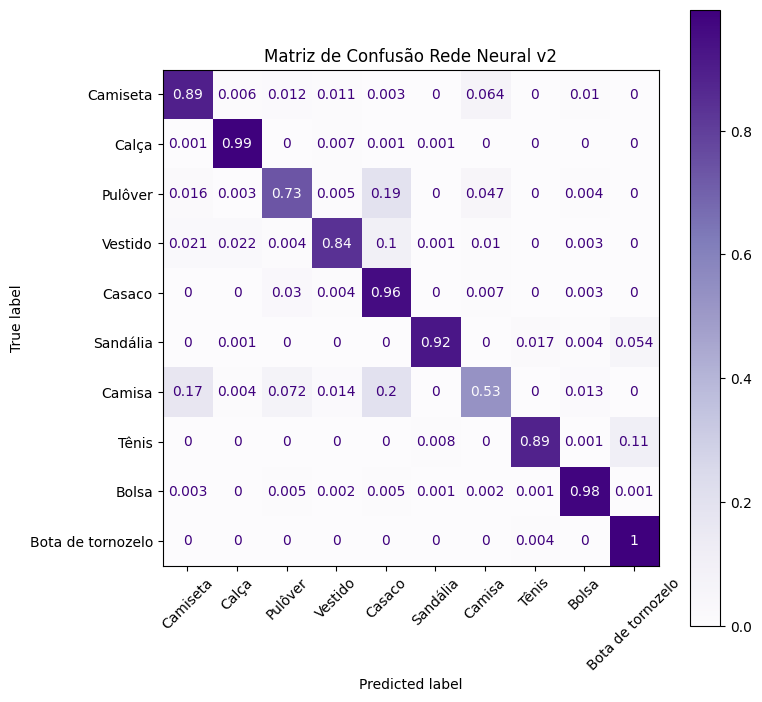

In [89]:
classifier = estimator(neural_network_modelv2, class_names)
figsize = (8,8)
ConfusionMatrixDisplay.from_estimator(classifier,X_test,Y_test, 
                                      cmap = 'Purples', 
                                      normalize='true', 
                                      ax=plt.subplots(figsize=figsize)[1],
                                      display_labels=class_names,
                                      xticks_rotation=45)
plt.title('Matriz de Confusão Rede Neural v2')
plt.show()

### **Rede Neural Convolucional (CNN)**

In [90]:
# Colunas dos pixels
X_train = train_fmnist.drop('label', axis=1)

# Colunas com a label
Y_train = train_fmnist['label']

In [91]:
x_train_cnn = np.array(X_train)
x_train_cnn = x_train_cnn.reshape((x_train_cnn.shape[0], 28, 28, 1)).astype('float32') / 255
x_train_cnn.shape

(60000, 28, 28, 1)

In [92]:
x_train_cnn, x_val_cnn, y_train_cnn, y_val_cnn = train_test_split(x_train_cnn, Y_train, test_size=0.2, random_state=42)

In [93]:
label_binarizer = LabelBinarizer()
y_train_encoded_cnn = label_binarizer.fit_transform(y_train_cnn)
y_val_encoded_cnn = label_binarizer.fit_transform(y_val_cnn)

In [94]:
cnn_modelv1 = Sequential([
    Conv2D(32, (3,3), 1, activation='relu', 
        input_shape=(28,28,1)),
    MaxPooling2D(),

    Conv2D(64, (3,3), 1, activation='relu'),
    MaxPooling2D(),

    Conv2D(128, (3,3), 1, activation='relu'),
    MaxPooling2D(),

    Flatten(),
    
    Dense(512, activation='relu'),
    
    Dense(10, activation='softmax')
])

adam = Adam(learning_rate=0.001)
cnn_modelv1.compile(optimizer=adam,
              loss=['categorical_crossentropy'],
              metrics=['accuracy'])

cnn_modelv1.summary()

c:\Users\018117631\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 163,850 (640.04 KB)

 Trainable params: 163,850 (640.04 KB)

 Non-trainable params: 0 (0.00 B)

> - A versão 2 do modelo possui na orimeira camada convolucional 32 filtros de tamanho 3x3, stride 1 e função de ativação ReLU sendo a entrada é uma imagem de 28x28 pixels em escala de cinza
> - Para todas as camadas convolucionais é aplicada uma regularização L2 com fator de penalidade de 0.01 nos pesos
> - Entre as camadas convolucionais há uma camada de pooling máxima
> - E antes das camadas densas existe uma camada Flatten na qual os dados são transformados em um vetor unidimensional
> - A primeira camada densa possui 512 neurônios e função de ativação ReLU enquanto a última, a camada de saída possui 10 neurônios (um para cada classe) e função de ativação softmax para produzir probabilidades

In [95]:
cnn_modelv2 = Sequential([
    Conv2D(32, (3,3), 1, activation='relu', 
        input_shape=(28,28,1),
        kernel_regularizer=l2(0.01)),
    MaxPooling2D(),

    Conv2D(64, (3,3), 1, activation='relu',
        kernel_regularizer=l2(0.01)),
    MaxPooling2D(),

    Conv2D(128, (3,3), 1, activation='relu',
        kernel_regularizer=l2(0.01)),
    MaxPooling2D(),

    Flatten(),
    
    Dense(512, activation='relu',
          kernel_regularizer=l2(0.01)),
    
    Dense(10, activation='softmax',
        kernel_regularizer=l2(0.01))
])

adam = Adam(learning_rate=0.001)
cnn_modelv2.compile(optimizer=adam,
              loss=['categorical_crossentropy'],
              metrics=['accuracy'])

cnn_modelv2.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 163,850 (640.04 KB)

 Trainable params: 163,850 (640.04 KB)

 Non-trainable params: 0 (0.00 B)

> A utilização de convoluções seguidas por operações de pooling permite que o modelo capture características locais e espaciais nas imagens, tornando-o adequado para tarefas de classificação de imagens.

### **Treinamento da Rede Neural Convolucional**

In [96]:
cnn_callback = EarlyStopping(monitor='loss', patience=3)
cnn_historyv1 = cnn_modelv1.fit(x_train_cnn,
            y_train_encoded_cnn,
            epochs=100,
            batch_size=500,
            verbose=0,
            shuffle=True,
            validation_data=(x_val_cnn, y_val_encoded_cnn),
            callbacks=[cnn_callback])

In [97]:
cnn_callback = EarlyStopping(monitor='loss', patience=3)
cnn_historyv2 = cnn_modelv2.fit(x_train_cnn,
            y_train_encoded_cnn,
            epochs=100,
            batch_size=500,
            verbose=0,
            shuffle=True,
            validation_data=(x_val_cnn, y_val_encoded_cnn),
            callbacks=[cnn_callback])

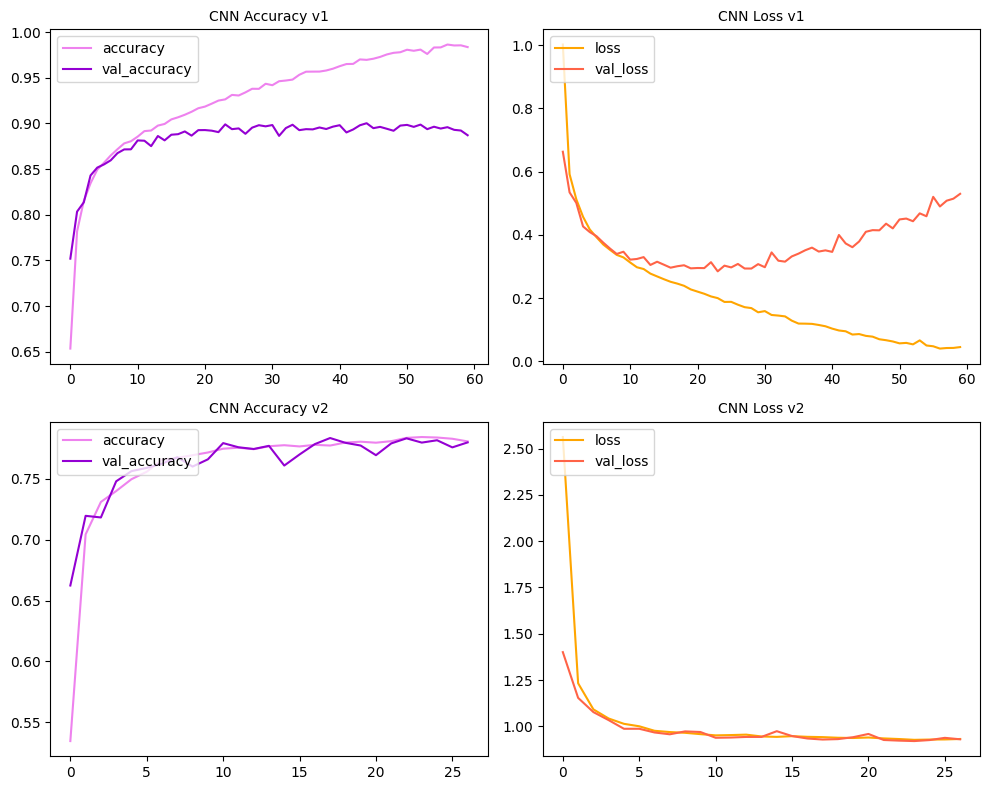

In [98]:
fig, axs = plt.subplots(2,2,figsize=(10,8))
axs[0, 0].plot(cnn_historyv1.history['accuracy'], color='violet', label='accuracy')
axs[0, 0].plot(cnn_historyv1.history['val_accuracy'], color='darkviolet', label='val_accuracy')
axs[0, 0].set_title('CNN Accuracy v1', fontsize=10)

axs[0, 1].plot(cnn_historyv1.history['loss'], color='orange',label='loss')
axs[0, 1].plot(cnn_historyv1.history['val_loss'], color='tomato', label='val_loss')
axs[0, 1].set_title('CNN Loss v1', fontsize=10)

axs[0, 0].legend(loc="upper left")
axs[0, 1].legend(loc="upper left")

axs[1, 0].plot(cnn_historyv2.history['accuracy'], color='violet', label='accuracy')
axs[1, 0].plot(cnn_historyv2.history['val_accuracy'], color='darkviolet', label='val_accuracy')
axs[1, 0].set_title('CNN Accuracy v2', fontsize=10)

axs[1, 1].plot(cnn_historyv2.history['loss'], color='orange',label='loss')
axs[1, 1].plot(cnn_historyv2.history['val_loss'], color='tomato', label='val_loss')
axs[1, 1].set_title('CNN Loss v2', fontsize=10)

axs[1, 0].legend(loc="upper left")
axs[1, 1].legend(loc="upper left")
plt.tight_layout()
plt.show()

### **Desempenho da CNN nos Dados de Teste**

In [99]:
x_test_cnn = np.array(x_test).reshape((x_test.shape[0], 28, 28, 1))
y_test_encoded = label_binarizer.fit_transform(Y_test)

In [100]:
results = cnn_modelv1.evaluate(x_test_cnn, y_test_encoded)

print('Test loss:', results[0])
print('Test accuracy:', results[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8885 - loss: 0.5383
Test loss: 0.5212711691856384
Test accuracy: 0.8920999765396118


In [101]:
results = cnn_modelv2.evaluate(x_test_cnn, y_test_encoded)

print('Test loss:', results[0])
print('Test accuracy:', results[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7856 - loss: 0.9276
Test loss: 0.9263738393783569
Test accuracy: 0.7857999801635742


In [104]:
y_true = Y_test
y_pred = cnn_modelv1.predict(x_test_cnn)
y_pred_discrete = np.argmax(y_pred, axis=1)

precision_v1, recall_v1, f1_score_v1, _ =precision_recall_fscore_support(y_true, y_pred_discrete, average='macro')

y_pred = cnn_modelv2.predict(x_test_cnn)
y_pred_discrete = np.argmax(y_pred, axis=1)
precision_v2, recall_v2, f1_score_v2, _ =precision_recall_fscore_support(y_true, y_pred_discrete, average='macro')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


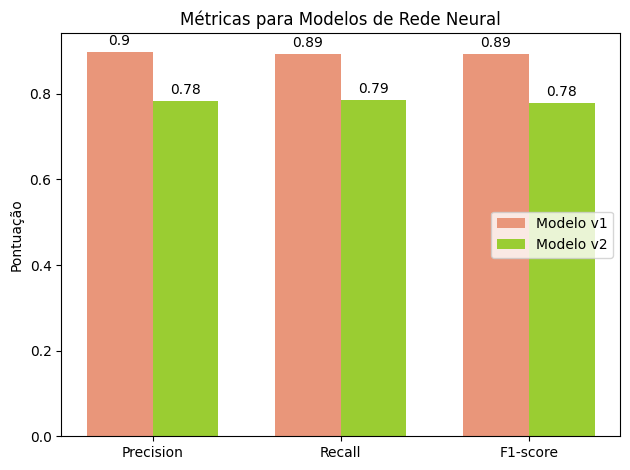

In [106]:
# Labels para os modelos
metrics = ['Precision', 'Recall', 'F1-score']

# Posições no eixo x para cada barra
x = np.arange(len(metrics))

# Largura das barras
width = 0.35

# Criando o gráfico de barras
fig, ax = plt.subplots()

# Adicionando as barras para cada métrica do modelo 1
rectangles1 = ax.bar(x - width/2, [precision_v1, recall_v1, f1_score_v1], width, color= 'darksalmon', label='Modelo v1')

# Adicionando as barras para cada métrica do modelo 2
rectangles2 = ax.bar(x + width/2, [precision_v2, recall_v2, f1_score_v2], width, color= 'yellowgreen', label='Modelo v2')

autolabel(rectangles1)
autolabel(rectangles2)

ax.set_ylabel('Pontuação')
ax.set_title('Métricas para Modelos de Rede Neural')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend(loc='center right')
plt.tight_layout()
plt.show()

#### **Matriz de Confusão para Avaliação dos Resultados**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


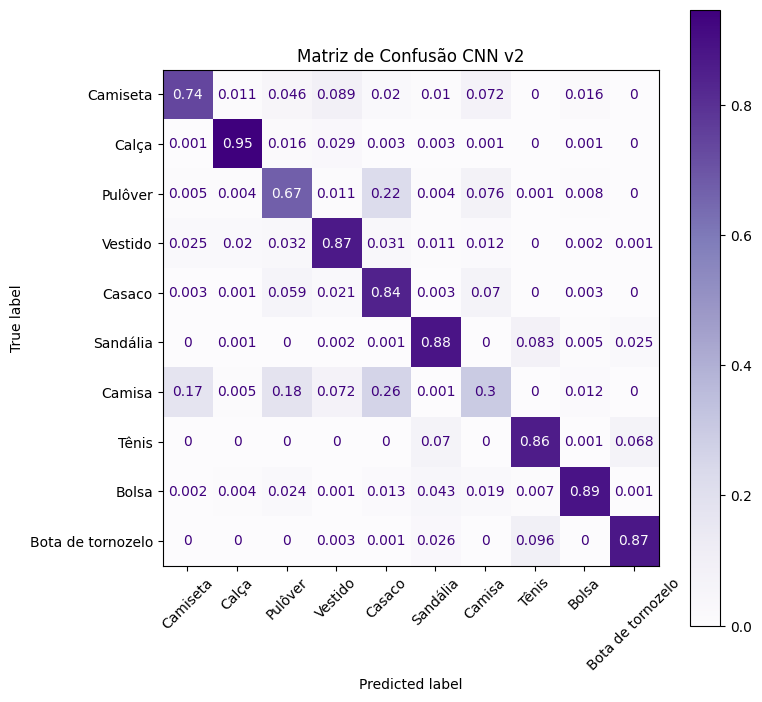

In [108]:
classifier = estimator(cnn_modelv2, class_names)
figsize = (8,8)
ConfusionMatrixDisplay.from_estimator(classifier,x_test_cnn,Y_test, 
                                      cmap = 'Purples', 
                                      normalize='true', 
                                      ax=plt.subplots(figsize=figsize)[1],
                                      display_labels=class_names,
                                      xticks_rotation=45)
plt.title('Matriz de Confusão CNN v2')
plt.show()